**Trực quan hóa dữ liệu**

In [41]:
import warnings
import matplotlib
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
matplotlib.rcParams["figure.figsize"] = (18, 10)

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


*Đọc dữ liệu từ file xlsx*

In [3]:
# Đường dẫn đến tệp tin Excel
df = pd.read_excel("D:\\ML\\Do-An\\HocMay1\\seattle_weather.xlsx")

# In dữ liệu ra màn hình
print(df)


            DATE  PRCP  TMAX  TMIN  RAIN
0     1948-01-01  0.47    51    42   1.0
1     1948-01-02  0.59    45    36   1.0
2     1948-01-03  0.42    45    35   1.0
3     1948-01-04  0.31    45    34   1.0
4     1948-01-05  0.17    45    32   1.0
...          ...   ...   ...   ...   ...
25546 2017-12-10  0.00    49    34   0.0
25547 2017-12-11  0.00    49    29   0.0
25548 2017-12-12  0.00    46    32   0.0
25549 2017-12-13  0.00    48    34   0.0
25550 2017-12-14  0.00    50    36   0.0

[25551 rows x 5 columns]


In [4]:
# kiểm tra só hàng và số cột của dữ liệu
df.shape

(25551, 5)

In [5]:
# kiểm tra nội dung từng cột trong dữ liệu
df.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

*Trực quan hóa dữ liệu*

- Biểu đồ biểu thị lượng mưa

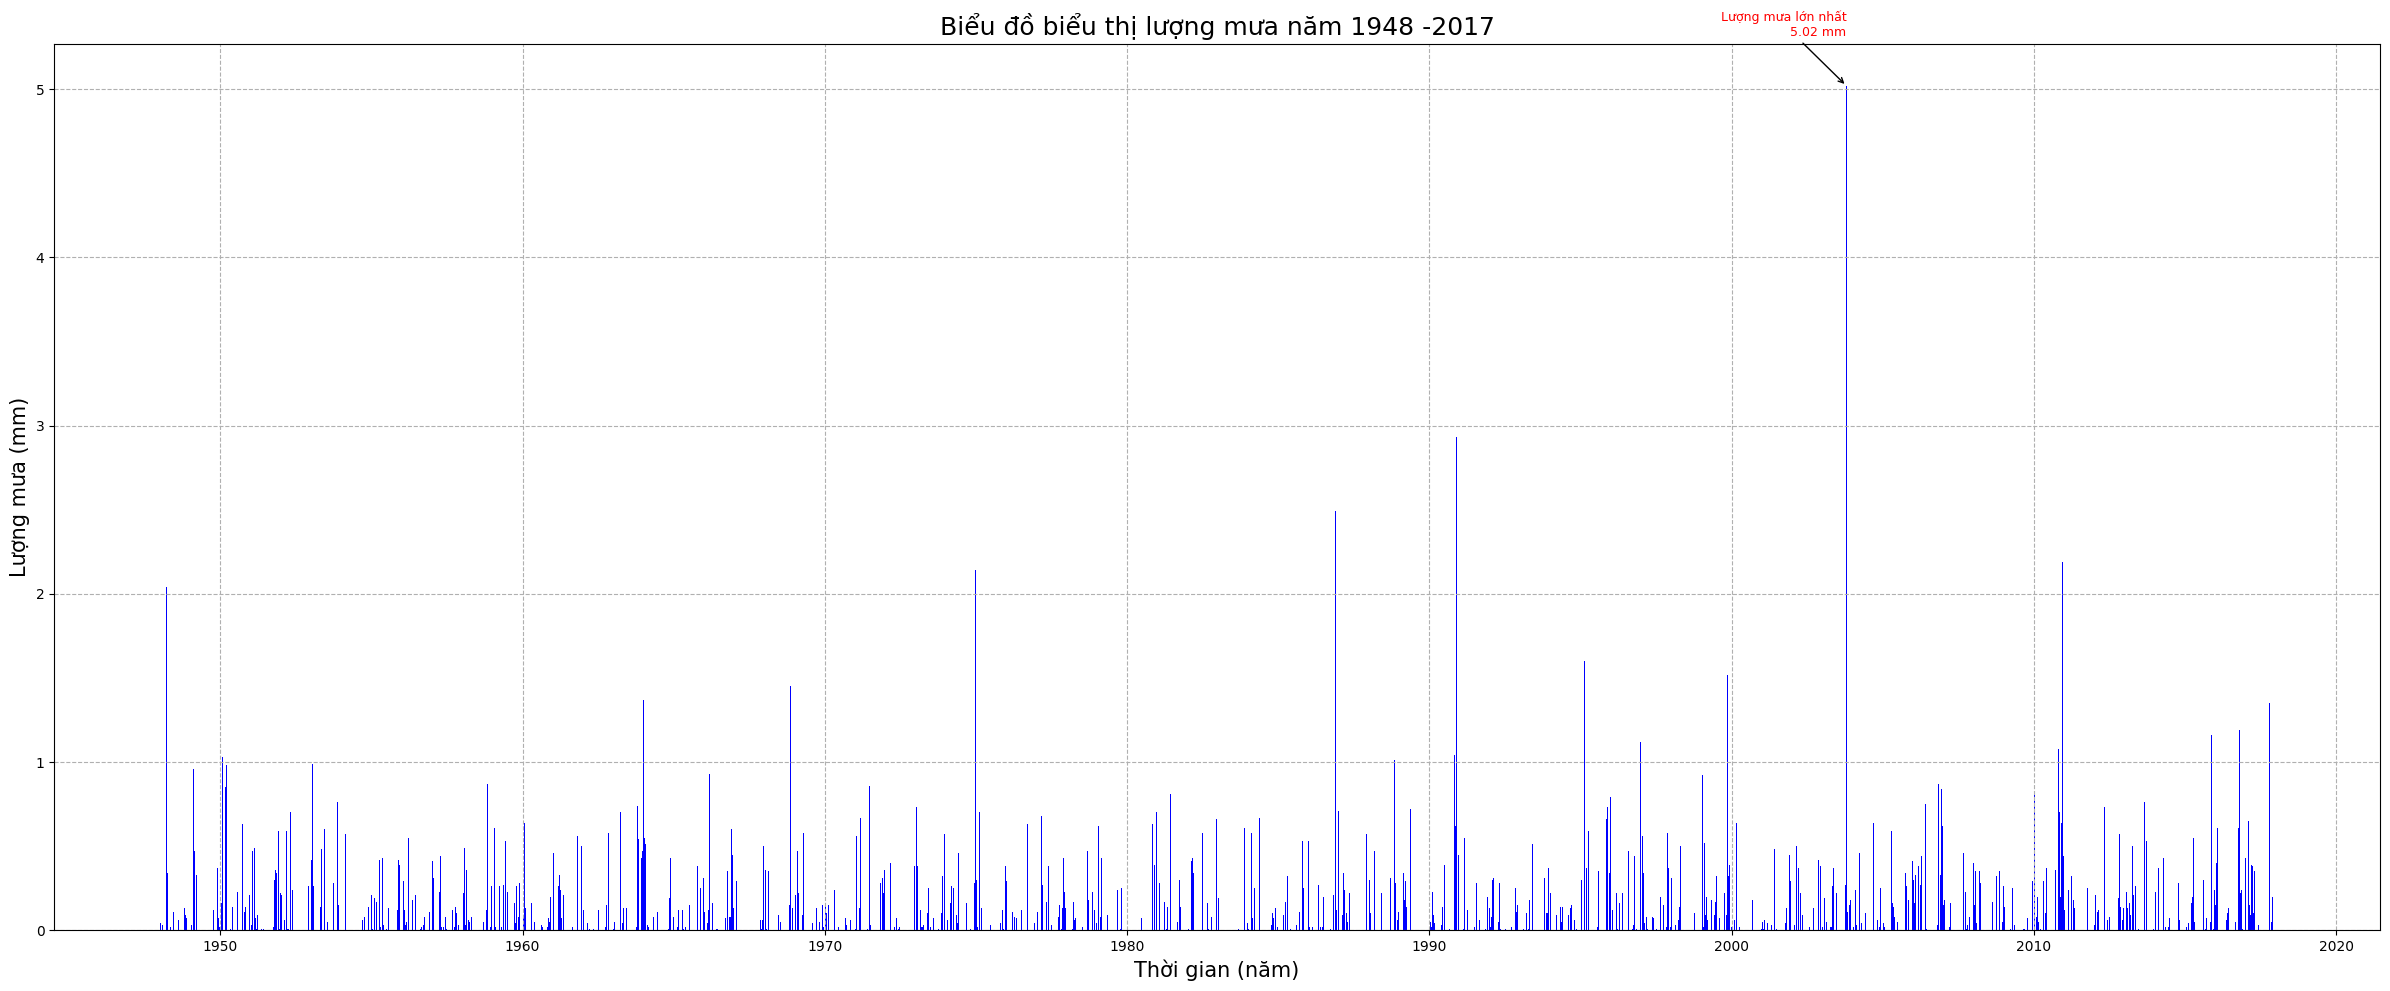

In [29]:
# Lấy dữ liệu từ DataFrame
dates = df['DATE']
prcp = df['PRCP']

# Tìm giá trị lớn nhất và chỉ số của nó
max_prcp_value = prcp.max()
max_prcp_index = prcp.idxmax()

# Vẽ biểu đồ cột với trục thứ y thứ hai
fig, ax1 = plt.subplots(figsize=(24, 10))
ax1.bar(dates, prcp, color='blue', label='Lượng mưa')
ax1.set_xlabel('Thời gian (năm)', fontsize=15)
ax1.set_ylabel('Lượng mưa (mm)', fontsize=15)
ax1.tick_params(axis='y')
ax1.set_title('Biểu đồ biểu thị lượng mưa năm 1948 -2017', fontsize=18)

# Thêm chú thích cho điểm đặc biệt (lượng mưa lớn nhất)
plt.annotate(f'Lượng mưa lớn nhất\n{max_prcp_value} mm',
             xy=(dates[max_prcp_index], max_prcp_value),
             xytext=(dates[max_prcp_index], max_prcp_value + 0.3),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='right', fontsize=9, color='red')

# Hiển thị biểu đồ
plt.tight_layout()
plt.grid(True, linestyle='--')
plt.show()

- Biểu đồ biểu thị nhiệt độ

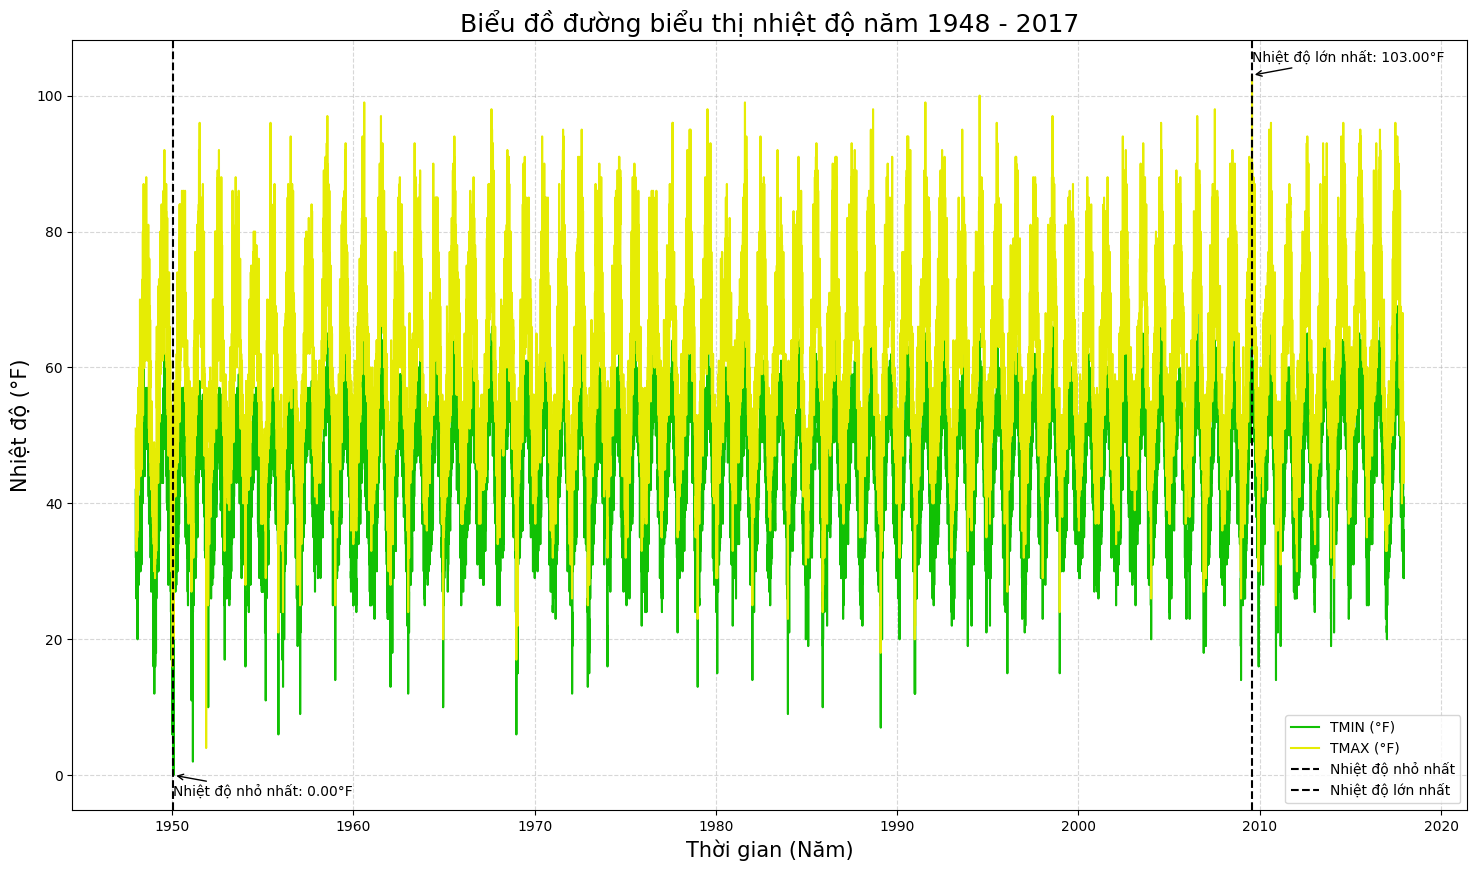

In [30]:
# Chuyển cột DATE sang định dạng thời gian
df['DATE'] = pd.to_datetime(df['DATE'])

# Vẽ biểu đồ đường cho TMIN và TMAX với thời gian từ bắt đầu đến cuối dữ liệu
plt.figure(figsize=(18, 10))
plt.plot(df['DATE'], df['TMIN'], label='TMIN (°F)', color='#11c104')
plt.plot(df['DATE'], df['TMAX'], label='TMAX (°F)', color='#e6ec04')

# Đặt nền cho biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)

# Vẽ drop lines từ điểm max và min về trục x
min_idx = df['TMIN'].idxmin()
max_idx = df['TMAX'].idxmax()
plt.axvline(df['DATE'][min_idx], color='black', linestyle='--', alpha=1, label='Nhiệt độ nhỏ nhất')
plt.axvline(df['DATE'][max_idx], color='black', linestyle='--', alpha=1, label='Nhiệt độ lớn nhất')

# Chú thích giá trị min và max
plt.annotate(f'Nhiệt độ nhỏ nhất: {df["TMIN"].min():.2f}°F', 
             xy=(df['DATE'][min_idx], df['TMIN'].min()), 
             xytext=(df['DATE'][min_idx], df['TMIN'].min() - 3),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Nhiệt độ lớn nhất: {df["TMAX"].max():.2f}°F', 
             xy=(df['DATE'][max_idx], df['TMAX'].max()), 
             xytext=(df['DATE'][max_idx], df['TMAX'].max() + 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Đặt tên cho trục và đặt tiêu đề
plt.xlabel('Thời gian (Năm)', fontsize=15)
plt.ylabel('Nhiệt độ (°F)', fontsize=15)
plt.title('Biểu đồ đường biểu thị nhiệt độ năm 1948 - 2017', fontsize=18)

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.show()


- Biểu đồ biểu thị tỉ lệ mưa và không mưa

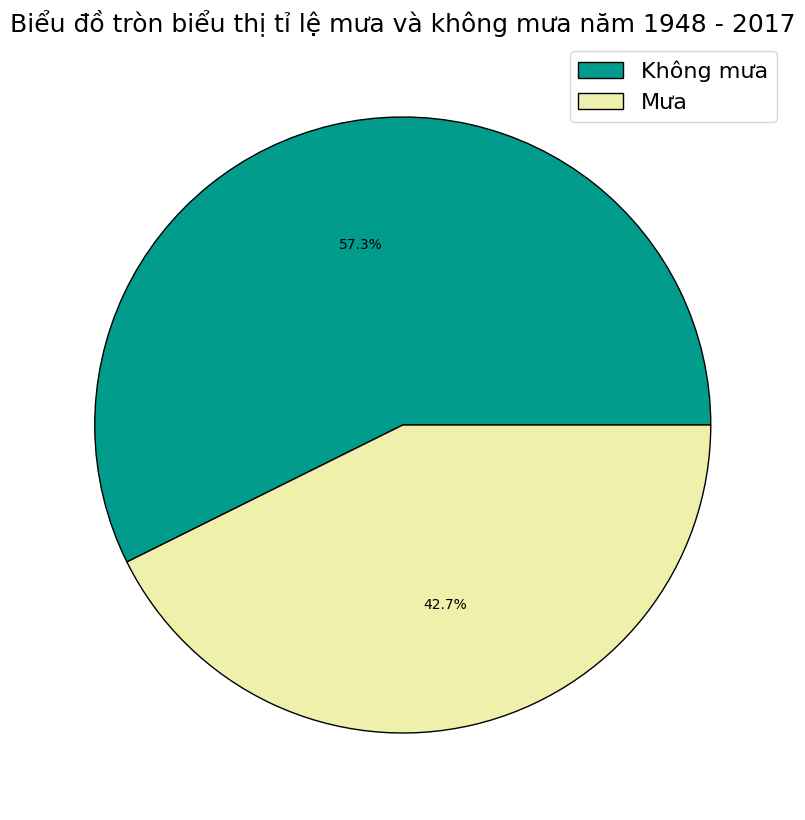

In [31]:
# Tính tỷ lệ giữa có mưa (TRUE) và không mưa (FALSE)
rain_counts = df['RAIN'].value_counts()

# Màu bạn muốn sử dụng
custom_colors = ['#029c8d', '#eef0ac']  # Thay đổi màu ở đây

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 10))
wedges, _, autotexts = plt.pie(rain_counts, labels=None, autopct='%1.1f%%', colors=custom_colors)

# Đặt màu cho đường viền
for wedge in wedges:
    wedge.set_edgecolor('black')

# Chú thích màu
legend_labels = ['Không mưa', 'Mưa']
plt.legend(labels=legend_labels, loc='upper right', fontsize=16)

plt.title('Biểu đồ tròn biểu thị tỉ lệ mưa và không mưa năm 1948 - 2017', fontsize=18)
plt.show()

**Tiền xử lý dữ liệu**

*Làm sạch dữ liệu (Data Cleaning)*

- Xử lý giá trị thiếu

In [32]:
# kiểm tra giá trị thiếu trong dữ liệu
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [403]:
# Xử lý giá trị thiếu trong cột 'PRCP' bằng cách điền giá trị trung bình
df['PRCP'].fillna(df['PRCP'].mean(), inplace=True)

# Xử lý giá trị thiếu trong cột 'RAIN' bằng cách chuyển giá trị của 'PRCP' thành True hoặc False
df['RAIN'] = df['PRCP'] > 0


In [404]:
# kiểm tra lại dữ liệu
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

- Kiểm tra dữ liệu lặp

In [33]:
# kiểm tra dữ liệu lặp
df.duplicated().sum()

0

- Xử lý dữ liệu nhiễu

In [34]:
# kiểm tra tổng quan về dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    25551 non-null  datetime64[ns]
 1   PRCP    25548 non-null  float64       
 2   TMAX    25551 non-null  int64         
 3   TMIN    25551 non-null  int64         
 4   RAIN    25548 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 998.2 KB
None


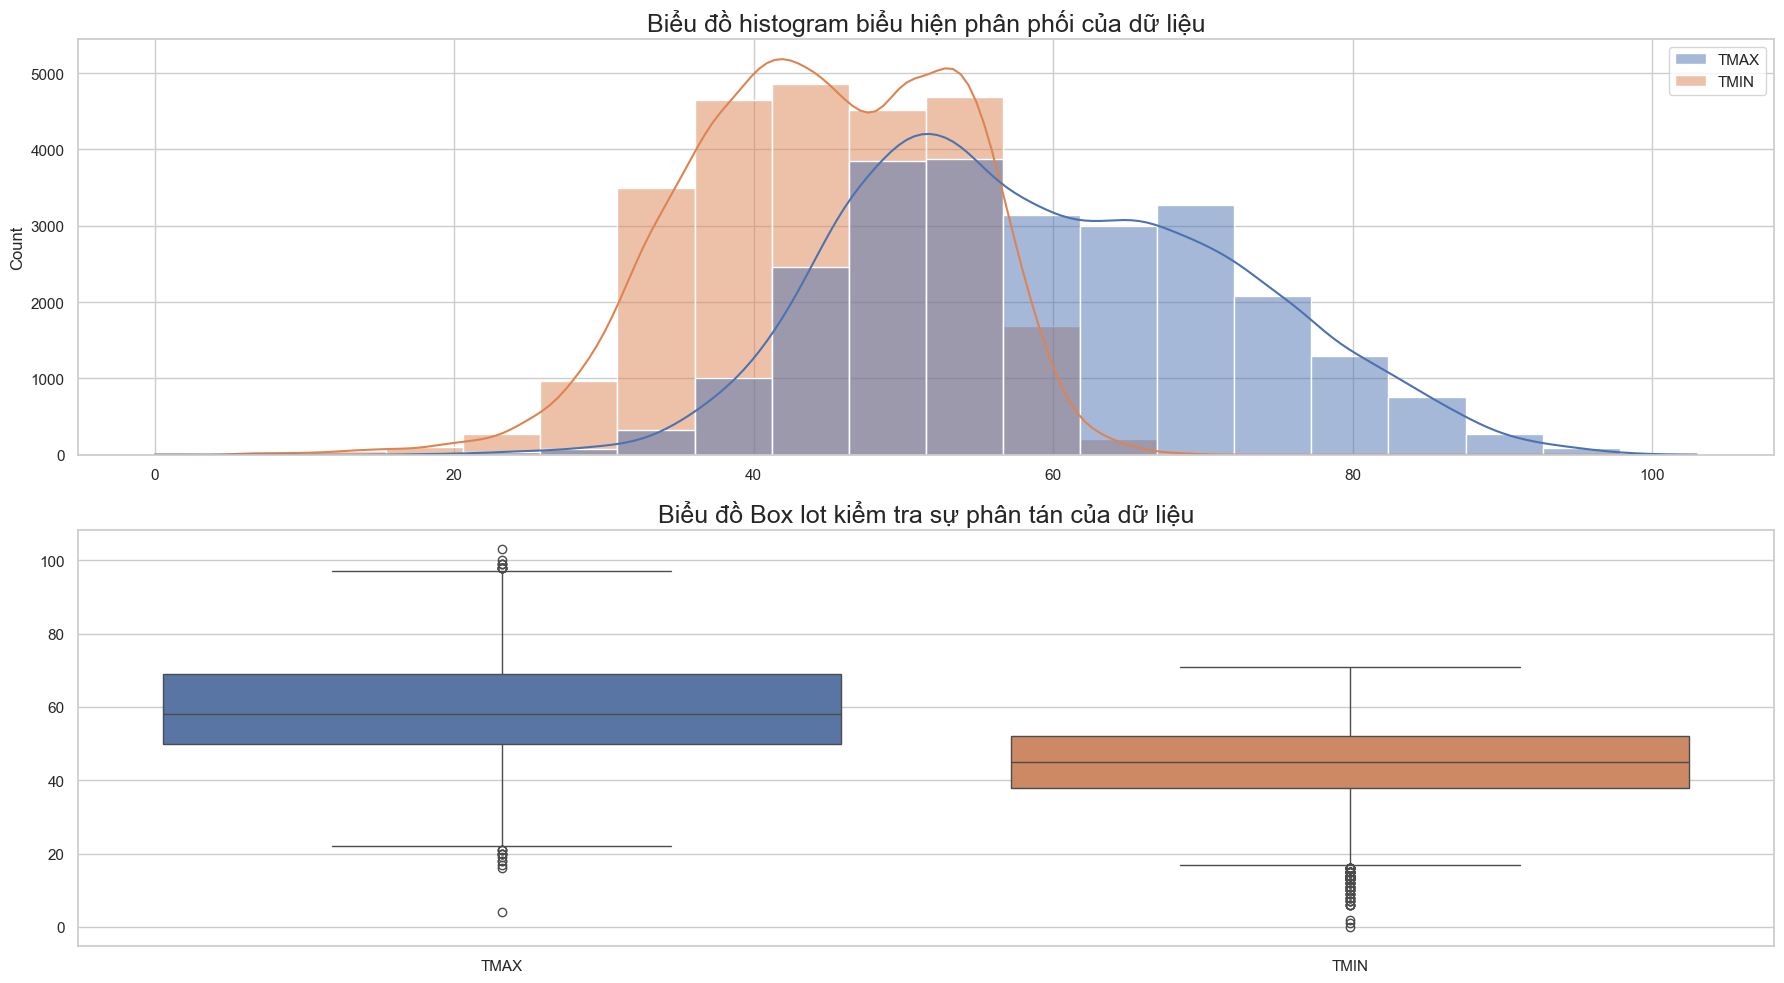

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))

# Histogram
plt.subplot(2, 1, 1)
sns.histplot(df[['TMAX', 'TMIN']], bins=20, kde=True)
plt.title('Biểu đồ histogram biểu hiện phân phối của dữ liệu', fontsize=18)

# Box plot
plt.subplot(2, 1, 2)
sns.boxplot(data = df[['TMAX', 'TMIN']])
plt.title('Biểu đồ Box lot kiểm tra sự phân tán của dữ liệu', fontsize=18)

plt.tight_layout()
plt.show()


In [36]:
# Chọn cột muốn xử lý nhiễu (ví dụ: 'Hours Studied')
column_to_process = 'PRCP'

# Tính giá trị Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df[column_to_process].quantile(0.25)
Q3 = df[column_to_process].quantile(0.75)

# Tính khoảng IQR (Interquartile Range)
IQR = Q3 - Q1

# Xác định ngưỡng cho việc xác định giá trị nhiễu
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc ra các dòng không chứa giá trị nhiễu
df_clean = df[(df[column_to_process] >= lower_bound) & (df[column_to_process] <= upper_bound)]

# In ra số lượng dữ liệu trước và sau khi xử lý nhiễu
print(f"Số lượng dữ liệu trước xử lý nhiễu: {len(df)}")
print(f"Số lượng dữ liệu sau xử lý nhiễu: {len(df_clean)}")

Số lượng dữ liệu trước xử lý nhiễu: 25551
Số lượng dữ liệu sau xử lý nhiễu: 21990


*Chuẩn hóa dữ liệu*
- Sử dụng Z-score normalization (Standardization)

In [37]:

# Chọn các cột cần chuẩn hóa (loại bỏ cột 'DATE' và 'RAIN' nếu không cần thiết)
columns_to_normalize = ['PRCP', 'TMAX', 'TMIN']

# Khởi tạo đối tượng StandardScaler
scaler = StandardScaler()

# Chuẩn hóa dữ liệu và lưu trữ tham số
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
mean_values = scaler.mean_
std_dev_values = scaler.scale_

# Hiển thị DataFrame sau khi chuẩn hóa
print(df)

# Lưu trữ tham số của StandardScaler
scaler_params = {
    'columns': columns_to_normalize,
    'mean_values': mean_values,
    'std_dev_values': std_dev_values
}

# Lưu trữ tham số vào một file (ví dụ: scaler_params.pkl)
import pickle

with open('scaler_params.pkl', 'wb') as file:
    pickle.dump(scaler_params, file)

            DATE      PRCP      TMAX      TMIN  RAIN
0     1948-01-01  1.521915 -0.668941 -0.282730   1.0
1     1948-01-02  2.023951 -1.138692 -0.957444   1.0
2     1948-01-03  1.312733 -1.138692 -1.069896   1.0
3     1948-01-04  0.852534 -1.138692 -1.182349   1.0
4     1948-01-05  0.266825 -1.138692 -1.407253   1.0
...          ...       ...       ...       ...   ...
25546 2017-12-10 -0.444392 -0.825525 -1.182349   0.0
25547 2017-12-11 -0.444392 -0.825525 -1.744610   0.0
25548 2017-12-12 -0.444392 -1.060400 -1.407253   0.0
25549 2017-12-13 -0.444392 -0.903816 -1.182349   0.0
25550 2017-12-14 -0.444392 -0.747233 -0.957444   0.0

[25551 rows x 5 columns]


- Xuất dữ liệu xlsx

In [ ]:
df.to_excel('D:\\ML\\Do-An\\HocMay1\\seattle_weather_output.xlsx', index=False)

**Bài toán học có giám sát**  
*Hồi quy tuyến tính*

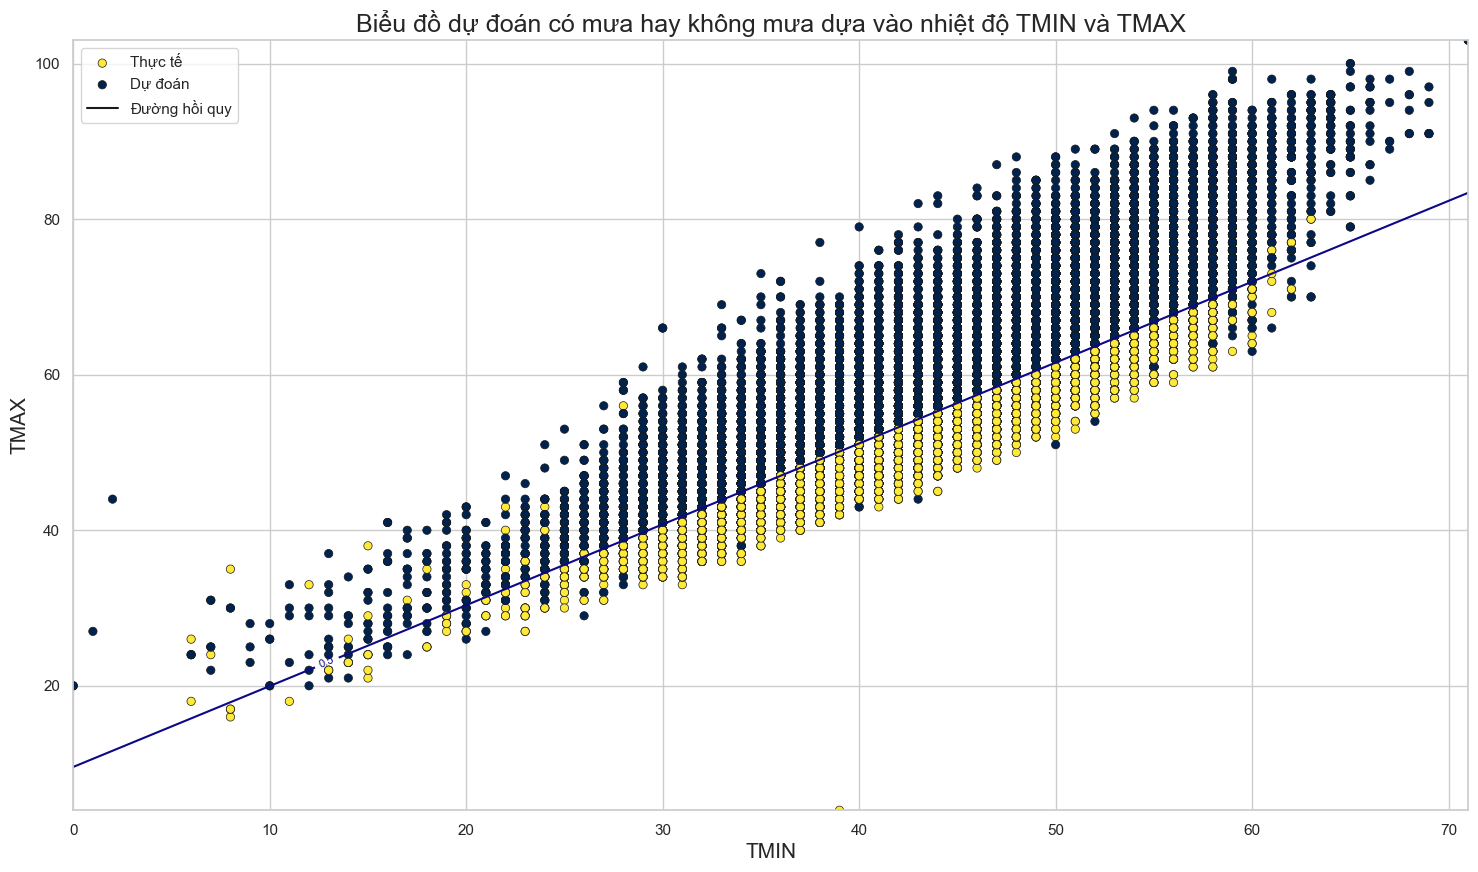

In [ ]:
# Chuyển cột RAIN thành biến nhị phân (0 nếu không có mưa, 1 nếu có mưa)
df_clean['RAIN'] = df_clean['RAIN'].astype(int)

# Lấy dữ liệu từ các cột TMIN và TMAX
X = df_clean[['TMIN', 'TMAX']]

# Lấy dữ liệu từ cột RAIN (biến mục tiêu)
y = df_clean['RAIN']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tạo mô hình logistic regression và huấn luyện trên tập huấn luyện
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Tạo dãy số từ giá trị min đến max của cột TMIN để vẽ đường hồi quy
tmin_values = np.linspace(df_clean['TMIN'].min(), df_clean['TMIN'].max(), 100)
tmax_values = np.linspace(df_clean['TMAX'].min(), df_clean['TMAX'].max(), 100)

# Tạo lưới dữ liệu
tmin_mesh, tmax_mesh = np.meshgrid(tmin_values, tmax_values)
X_mesh = np.column_stack((tmin_mesh.ravel(), tmax_mesh.ravel()))
X_mesh_scaled = scaler.transform(X_mesh)

# Dự đoán xác suất cho từng điểm trên lưới
probabilities = model.predict_proba(X_mesh_scaled)[:, 1]
probabilities = probabilities.reshape(tmin_mesh.shape)

# Vẽ đường hồi quy logistic với linestyle='solid' (đường liền)
contour = plt.contour(tmin_mesh, tmax_mesh, probabilities, cmap='plasma', linestyle='solid')
plt.clabel(contour, fontsize=8)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Vẽ biểu đồ dữ liệu thực tế
scatter_actual = plt.scatter(df_clean['TMIN'], df_clean['TMAX'], c=df_clean['RAIN'], cmap='cividis', edgecolors='k', marker='o', linewidths=0.5)

# Vẽ biểu đồ điểm dự đoán và thêm nhãn dán cho nó
scatter_pred = plt.scatter(X_test['TMIN'], X_test['TMAX'], c=y_pred, cmap='cividis', edgecolors='k', marker='o', linewidths=0.5)

# Tạo nhãn dán cho đường hồi quy
line_legend = Line2D([0], [0], color='k', linestyle='solid')

# Tạo hộp chú thích
legend_elements = [scatter_actual, scatter_pred, line_legend]
labels = ['Thực tế', 'Dự đoán', 'Đường hồi quy']
plt.legend(handles=legend_elements, labels=labels)
plt.title('Biểu đồ dự đoán có mưa hay không mưa dựa vào nhiệt độ TMIN và TMAX', fontsize=18)
plt.xlabel('TMIN', fontsize=15)
plt.ylabel('TMAX', fontsize=15)
plt.show()